In [ ]:
! pip install tensorflow

In [1]:
import tensorflow as tf

from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30
)


In [30]:

imght = 200
imgwdth = 300
batch = 32
train_gen = data_gen.flow_from_directory(
    "./Dataset/train",
    target_size=(imght, imgwdth),
    batch_size=32,
    class_mode='categorical'
)
test_gen = data_gen.flow_from_directory(
    "./Dataset/test",
    target_size = (imght, imgwdth),
    class_mode='categorical'
)

val_gen = data_gen.flow_from_directory(
    "./Dataset/validation",
    target_size=(imght, imgwdth),
    batch_size=32,
    class_mode='categorical'
)

Found 273 images belonging to 4 classes.
Found 125 images belonging to 4 classes.
Found 105 images belonging to 4 classes.


In [39]:
model = models.Sequential([
    layers.Conv2D(256,(3,3), activation='relu', input_shape=(imght,imgwdth, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='softmax')
]) 

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // batch,
    epochs=20,
    validation_data=val_gen,
)

Epoch 1/20
8/8 [==============================] - 53s 7s/step - loss: 1.4366 - accuracy: 0.2739 - val_loss: 1.3560 - val_accuracy: 0.3333
Epoch 2/20
8/8 [==============================] - 53s 7s/step - loss: 1.3774 - accuracy: 0.2905 - val_loss: 1.5178 - val_accuracy: 0.1619
Epoch 3/20
8/8 [==============================] - 53s 7s/step - loss: 1.2460 - accuracy: 0.3817 - val_loss: 1.3775 - val_accuracy: 0.3714
Epoch 4/20
8/8 [==============================] - 49s 6s/step - loss: 1.2315 - accuracy: 0.3942 - val_loss: 1.4255 - val_accuracy: 0.3810
Epoch 5/20
8/8 [==============================] - 49s 6s/step - loss: 1.2284 - accuracy: 0.3568 - val_loss: 1.3553 - val_accuracy: 0.3143
Epoch 6/20
8/8 [==============================] - 49s 6s/step - loss: 1.1781 - accuracy: 0.4315 - val_loss: 1.2302 - val_accuracy: 0.4286
Epoch 7/20
8/8 [==============================] - 49s 6s/step - loss: 1.1898 - accuracy: 0.4232 - val_loss: 1.4162 - val_accuracy: 0.1429
Epoch 8/20
8/8 [==================

In [42]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

4/4 [==============================] - 6s 1s/step - loss: 0.9836 - accuracy: 0.5680
Test Loss: 0.9835916757583618
Test Accuracy: 0.5680000185966492


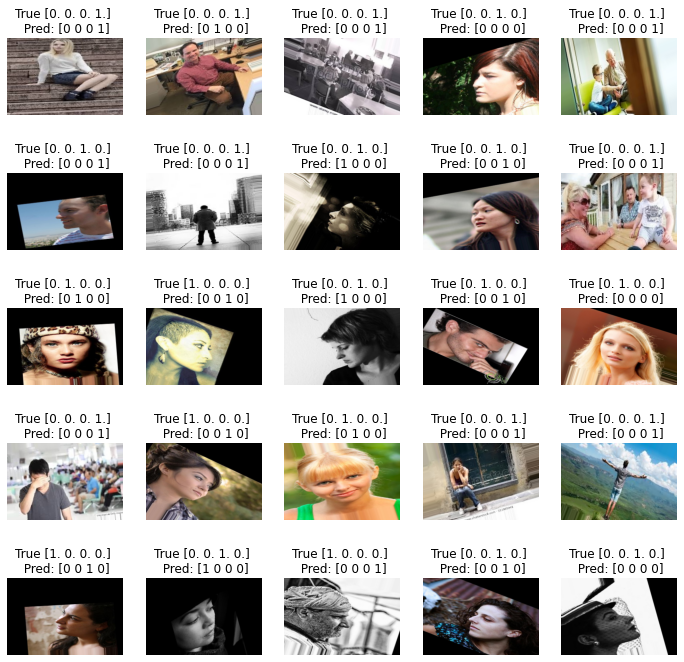

In [43]:
import matplotlib.pyplot as plt
x_val, y_val = next(test_gen)
pred = model.predict(x_val)
p_classes = (pred > 0.5).astype('int32')
plt.figure(figsize=(12,12))
imgs = 25
for i in range(imgs):
    plt.subplot(5,5,i+1)
    plt.imshow(x_val[i])
    plt.axis('off')
    plt.title(f"True {y_val[i]} \n Pred: {p_classes[i]}")

In [48]:
model.save('model.h5')